In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [13]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [19]:
trainset = torchvision.datasets.MNIST(root='/files/', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='/files/', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

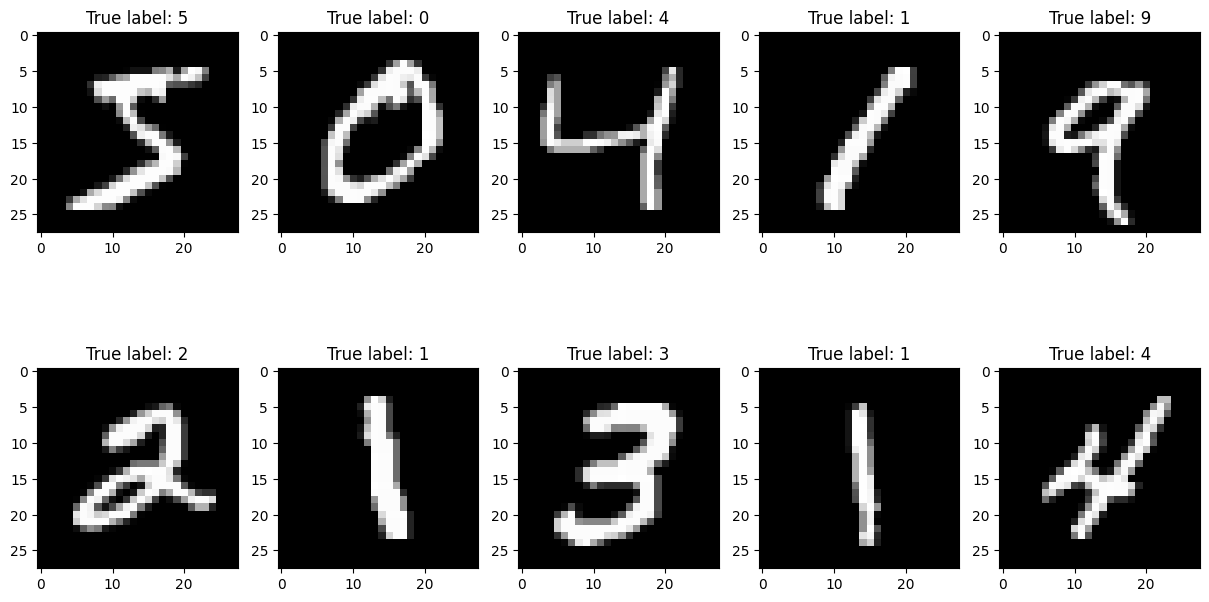

In [20]:
# Plot a few example images
fig, ax = plt.subplots(2, 5, figsize=(15, 8))
for i, axi in enumerate(ax.flat):
    axi.imshow(trainset[i][0].squeeze(), cmap='gray')
    axi.set_title(f'True label: {trainset[i][1]}')

In [21]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [22]:
mod = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(mod.parameters(), lr=0.01)

In [23]:
for epoch in range(100):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = mod(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    if (epoch+1) % 10== 0:
        print(f'Epoch: {epoch + 1} Loss: {running_loss / len(trainloader)}')

Epoch: 10 Loss: 0.12382064947187266
Epoch: 20 Loss: 0.07232552874875046
Epoch: 30 Loss: 0.0493647236007649
Epoch: 40 Loss: 0.035949954773728324
Epoch: 50 Loss: 0.027127032637345925
Epoch: 60 Loss: 0.02101115468514166
Epoch: 70 Loss: 0.016602231011882837
Epoch: 80 Loss: 0.01332601170596192
Epoch: 90 Loss: 0.010949666303622702
Epoch: 100 Loss: 0.009111983615764555


In [24]:
torch.save(mod.state_dict(), 'mlp_model.pt')